<a href="https://colab.research.google.com/github/jlcalleu18/Datathon-Winter22/blob/main/Group_5_Final_Notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Task 1 : Environment Set up

Import all required libraries that are needed for data analysis

In [48]:
!pip install sorted-months-weekdays
!pip install sort-dataframeby-monthorweek
!pip install jupyter-dash

In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style

import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

import cufflinks as cf
from jupyter_dash import JupyterDash
from dash import dcc
from dash import html
from dash.dependencies import Input, Output 

In [50]:
from sorted_months_weekdays import *

from sort_dataframeby_monthorweek import *

# Task 2 :  Data Collection

Use nytimes github repository as a data source to collect the covid 19 data in real time and ingest it into colab notebook for data anlysis purpose

In [51]:
df = pd.read_csv('https://raw.githubusercontent.com/nytimes/covid-19-data/master/us-states.csv')

In [52]:
df.head()

,date,state,fips,cases,deaths
0,2020-01-21,Washington,53,1,0
1,2020-01-22,Washington,53,1,0
2,2020-01-23,Washington,53,1,0
3,2020-01-24,Illinois,17,1,0
4,2020-01-24,Washington,53,1,0


In [53]:
df.shape

(38478, 5)

In [54]:
df.columns

Index(['date', 'state', 'fips', 'cases', 'deaths'], dtype='object')



# Task 3 : Data Wrangling and EDA (Exploratory Data Analysis)

Analyzing New York state data for Covid 19

In [55]:
# creating the var ny_df
# which will contain rows only if they match
# the state column having 'New York'
ny_df = df[df['state']=='New York']

In [56]:
# preview of the data 
# showing us the date
# the state of new york being the focus
# the fips
# cases
# deaths
ny_df.head()

,date,state,fips,cases,deaths
246,2020-03-01,New York,36,1,0
261,2020-03-02,New York,36,1,0
276,2020-03-03,New York,36,2,0
293,2020-03-04,New York,36,11,0
313,2020-03-05,New York,36,22,0


In [57]:
# the shape is 683 rows and 5 columns
# columns are date, state, fips, cases, deaths
ny_df.shape

(699, 5)

In [58]:
# the tail of the data is shown
# showing us the date
# the state of new york being the focus
# the fips
# cases
# deaths
ny_df.tail()


,date,state,fips,cases,deaths
38232,2022-01-24,New York,36,4698835,62960
38288,2022-01-25,New York,36,4714703,63264
38344,2022-01-26,New York,36,4730351,63505
38400,2022-01-27,New York,36,4747515,63697
38456,2022-01-28,New York,36,4761590,63910


In [59]:
#first death in NY
# first_ny_death dataframe shows us where deaths are not equal to 0
# so every row here will contain of at least 1 death
first_ny_death = ny_df[ny_df['deaths']!=0]
first_ny_death.head()

,date,state,fips,cases,deaths
669,2020-03-14,New York,36,610,2
722,2020-03-15,New York,36,732,6
775,2020-03-16,New York,36,950,10
828,2020-03-17,New York,36,1375,18
882,2020-03-18,New York,36,2387,32


In [60]:
# total  hight number of cases
ny_df['cases'].max()

4761590

#Find number of new cases and deaths reported in each month

In [61]:
ny = ny_df.copy()

In [62]:
ny_df.head()

,date,state,fips,cases,deaths
246,2020-03-01,New York,36,1,0
261,2020-03-02,New York,36,1,0
276,2020-03-03,New York,36,2,0
293,2020-03-04,New York,36,11,0
313,2020-03-05,New York,36,22,0


In [63]:
#creting a new variable with the newdeath in NY
newdeaths = []
previuos_death = 0
for index, row in ny_df.iterrows():
  current_death = row['deaths']
  newdeath_count = current_death - previuos_death
  previuos_death = current_death
  newdeaths.append(newdeath_count)
  #print(newcase_count)

In [64]:
#adding to the table
ny_df['new_deaths'] = newdeaths

In [65]:
ny_df.head()

,date,state,fips,cases,deaths,new_deaths
246,2020-03-01,New York,36,1,0,0
261,2020-03-02,New York,36,1,0,0
276,2020-03-03,New York,36,2,0,0
293,2020-03-04,New York,36,11,0,0
313,2020-03-05,New York,36,22,0,0


In [66]:
#new cases for NY
# type(ny_df['cases'])

newcase = []
previuos_case = 0
for index, row in ny_df.iterrows():
  current_case = row['cases']
  newcase_count = current_case - previuos_case
  previuos_case = current_case
  newcase.append(newcase_count)
  #print(newcase_count)

In [67]:
#creting a new column with the new cases
ny_df['new_cases'] = newcase

In [68]:
# create a support series with the name of the month of each row
month_names = ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]
months = ny["date"].apply(lambda date: month_names[int(date.split("-")[1])-1])

In [69]:
#creting a new column called months
ny_df['month'] = months

In [70]:
#creting a new column called of years by 
ny_df['year'] = pd.DatetimeIndex(ny_df['date']).year

In [71]:
ny_df.head()

,date,state,fips,cases,deaths,new_deaths,new_cases,month,year
246,2020-03-01,New York,36,1,0,0,1,Mar,2020
261,2020-03-02,New York,36,1,0,0,0,Mar,2020
276,2020-03-03,New York,36,2,0,0,1,Mar,2020
293,2020-03-04,New York,36,11,0,0,9,Mar,2020
313,2020-03-05,New York,36,22,0,0,11,Mar,2020


In [209]:
df_grouped = (ny_df.groupby(['month','year',])
                ['new_deaths', 'new_cases']
                .sum()
                )
df_grouped

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



new_deaths  new_cases
month year                       
Apr   2020       21687     233485
      2021        1938     174727
Aug   2020         169      19757
      2021         581     127783
Dec   2020        3407     326292
      2021        1944     745358
Feb   2021        3965     223960
Jan   2021        5621     441124
      2022        4917    1287620
Jul   2020         596      21581
      2021         171      35298
Jun   2020        2077      22567
      2021         337      12514
Mar   2020        1929      76211
      2021        2647     227471
May   2020        6083      65879
      2021        1030      54311
Nov   2020         998     140525
      2021        1054     170682
Oct   2020         395      48854
      2021        1062     133395
Sep   2020         216      23889
      2021        1086     148307

In [210]:
df_grouped.reset_index(level=0, inplace=True)

In [211]:
df_grouped.reset_index(level=0, inplace=True)

In [195]:
df_grouped = Sort_Dataframeby_Month(df=df_grouped,monthcolumnname='month')

In [217]:
ny_yearly = df_grouped.sort_values(by=['year'])

In [218]:
ny_yearly

,year,month,new_deaths,new_cases
0,2020,Apr,21687,233485
19,2020,Oct,395,48854
17,2020,Nov,998,140525
15,2020,May,6083,65879
13,2020,Mar,1929,76211
21,2020,Sep,216,23889
9,2020,Jul,596,21581
11,2020,Jun,2077,22567
4,2020,Dec,3407,326292
2,2020,Aug,169,19757


In [220]:
fig = go.Figure()
fig.add_trace(go.Bar(
    x=[ny_yearly['year'], ny_yearly['month']],
    y=ny_yearly['new_cases'],
    name='New_cases',
    hovertemplate="<br>".join([
            "Year-Month: %{x}",
            "New Deaths: %{y}",
        ])
))
fig.add_trace(go.Bar(
    x=[ny_yearly['year'], ny_yearly['month']],
    y=ny_yearly['new_deaths'],
    name='New_deaths',
    hovertemplate="<br>".join([
            "Year-Month: %{x}",
            "New Deaths: %{y}",
        ])

))
# Here we modify the tickangle of the xaxis, resulting in rotated labels.
fig.update_layout(barmode='group')
fig.update_yaxes(type='log')
fig.show()

##New deaths in New York in 2020

In [73]:
ny_2020_df = ny_df[ny_df['year'] == 2020]

In [74]:
ny_2020_df['new_deaths'].sum()

37557

In [75]:
apr = ny_2020_df[ny_2020_df['month'] == 'Apr']

In [76]:
apr['new_deaths'].sum()

21687

In [77]:
df_grouped_2020 = (ny_2020_df.groupby(['month',])
                ['new_deaths', 'new_cases']
                .sum()
                )
df_grouped_2020

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



,new_deaths,new_cases
month,,
Apr,21687,233485
Aug,169,19757
Dec,3407,326292
Jul,596,21581
Jun,2077,22567
Mar,1929,76211
May,6083,65879
Nov,998,140525
Oct,395,48854


In [78]:
df_grouped_2020.reset_index(level=0, inplace=True)

In [79]:
ny_2020 = Sort_Dataframeby_Month(df=df_grouped_2020,monthcolumnname='month')

# Insight 1 , 2020

There is a U-Shape happening between the discovery of covid in March, going through Dec of 2020. Meaning the colder months seem to have more cases, and more deaths than the warmer months in the year.
So if we look at October, the vaccine rollout started happening and the deaths started to go down even though, new cases kept going up.

In [80]:
fig = go.Figure()
fig.add_trace(go.Bar(
    x=ny_2020['month'],
    y=ny_2020['new_cases'],
    name='New_cases',
))
fig.add_trace(go.Bar(
    x=ny_2020['month'],
    y=ny_2020['new_deaths'],
    name='New_deaths',
))
# Here we modify the tickangle of the xaxis, resulting in rotated labels.
fig.update_layout(barmode='group')
fig.update_yaxes(type='log')
fig.show()

##New deaths in New York in 2021

In [81]:
ny_2021_df = ny_df[ny_df['year'] == 2021]

In [82]:
df_grouped_2021 = (ny_2021_df.groupby(['month',])
                ['new_deaths', 'new_cases']
                .sum()
                )
df_grouped_2021

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



,new_deaths,new_cases
month,,
Apr,1938,174727
Aug,581,127783
Dec,1944,745358
Feb,3965,223960
Jan,5621,441124
Jul,171,35298
Jun,337,12514
Mar,2647,227471
May,1030,54311


In [83]:
df_grouped_2021.reset_index(level=0, inplace=True)

In [84]:
ny_2021 = Sort_Dataframeby_Month(df=df_grouped_2021,monthcolumnname='month')

# Insight 2, 2021
The deaths decreased by A LOT, April of 2020 had 20k+ deaths in NY, but  April of 2021, only had 1,938 deaths. So the vaccination and quaratine efforts seem to have been working.

Towards July onwards, the new covid variant increases the new cases, and deaths, but not at the scale of 2020. So with vaccination, quaratine, social distancing, and many other rules, it seems that deaths were lower.

In [85]:
fig = go.Figure()
fig.add_trace(go.Bar(
    x=ny_2021['month'],
    y=ny_2021['new_cases'],
    name='New_cases',
))
fig.add_trace(go.Bar(
    x=ny_2021['month'],
    y=ny_2021['new_deaths'],
    name='New_deaths',
))
# Here we modify the tickangle of the xaxis, resulting in rotated labels.
fig.update_layout(barmode='group')
fig.update_yaxes(type='log')
fig.show()

##New deaths and new Cases in New York in 2022

In [86]:
ny_2022_df = ny_df[ny_df['year'] == 2022]
df_grouped_2022 = (ny_2022_df.groupby(['month',])
                ['new_deaths', 'new_cases']
                .sum()
                )
df_grouped_2022

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



,new_deaths,new_cases
month,,
Jan,4917,1287620


In [87]:
ny_2022_df.head()

,date,state,fips,cases,deaths,new_deaths,new_cases,month,year
36944,2022-01-01,New York,36,3555047,59072,79,81077,Jan,2022
37000,2022-01-02,New York,36,3617589,59152,80,62542,Jan,2022
37056,2022-01-03,New York,36,3678042,59240,88,60453,Jan,2022
37112,2022-01-04,New York,36,3729331,59339,99,51289,Jan,2022
37168,2022-01-05,New York,36,3804480,59485,146,75149,Jan,2022


In [88]:
df_grouped_2022.reset_index(level=0, inplace=True)

In [89]:
ny_2022 = Sort_Dataframeby_Month(df=df_grouped_2022,monthcolumnname='month')

# Insight 3, 2022


Boom Shaklaka 

January of 2022, smacks us in the face with 1.28Million new cases of covid,

But an interesting development of 4917 deaths. That is a huge amount of lives saved, because at this point the state of NY has a 73~% vaccine rate.

So it poses the question, are people getting repeat infections, or are these actually new cases?

In [90]:
fig = go.Figure()
fig.add_trace(go.Bar(
    x=ny_2022['month'],
    y=ny_2022['new_cases'],
    name='New_cases',
))
fig.add_trace(go.Bar(
    x=ny_2022['month'],
    y=ny_2022['new_deaths'],
    name='New_deaths',
))
# Here we modify the tickangle of the xaxis, resulting in rotated labels.
fig.update_layout(barmode='group')
fig.update_yaxes(type='log')
fig.show()

# Finance Section

Environment Setup

In [91]:
pip install yfinance

In [92]:
import pandas as pd
from pandas import Series,DataFrame
import numpy as np

# For Visualization
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

# For reading stock data from yahoo
# from pandas_datareader import DataReader
import yfinance as yf
# For time stamps
from datetime import datetime

# For division
from __future__ import division

# Data Collection

In [93]:
# The tech stocks we'll use for this analysis
tech_list = ['JBLU','DIS','NVDA','TSLA','GME']


# Set up End and Start times for data grab
end = datetime.now()
start = datetime(end.year - 2,end.month,end.day)


#For loop for grabing yahoo finance data and setting as a dataframe

for stock in tech_list:
  # Set DataFrame as the Stock Ticker
  globals()[stock] = yf.download(stock,start,end)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [94]:
# Jet Blue stats and info
print(JBLU.describe())

             Open        High         Low       Close   Adj Close        Volume
count  506.000000  506.000000  506.000000  506.000000  506.000000  5.060000e+02
mean    14.621759   14.920870   14.274941   14.573518   14.573518  9.889921e+06
std      3.448850    3.439900    3.454297    3.461897    3.461897  5.754525e+06
min      7.550000    7.690000    6.610000    6.860000    6.860000  3.349600e+06
25%     11.977500   12.292500   11.537500   11.922500   11.922500  6.285925e+06
50%     14.745000   14.980000   14.485000   14.690000   14.690000  8.228900e+06
75%     16.285001   16.575000   15.990000   16.245000   16.245000  1.184222e+07
max     21.580000   21.959999   21.219999   21.639999   21.639999  5.792500e+07


In [95]:
# Walt Disney stats and info
print(DIS.describe())
#DIS.describe()

             Open        High         Low       Close   Adj Close        Volume
count  506.000000  506.000000  506.000000  506.000000  506.000000  5.060000e+02
mean   151.385534  153.097747  149.415376  151.277016  151.277016  1.260625e+07
std     29.504622   29.426476   29.564742   29.394955   29.394955  8.392571e+06
min     84.489998   87.279999   79.070000   85.760002   85.760002  2.721000e+06
25%    124.660002  126.027502  123.292500  124.117502  124.117502  7.511200e+06
50%    153.635002  155.275002  152.535004  154.150002  154.150002  9.826350e+06
75%    177.187496  178.645004  175.617496  176.997501  176.997501  1.444150e+07
max    200.190002  203.020004  195.399994  201.910004  201.910004  8.741070e+07


In [96]:
#NVIDIA
print(NVDA.describe())

             Open        High         Low       Close   Adj Close        Volume
count  506.000000  506.000000  506.000000  506.000000  506.000000  5.060000e+02
mean   154.267371  157.022362  151.182090  154.199175  154.100252  4.291835e+07
std     68.449474   69.780911   66.619495   68.094542   68.139773  2.131822e+07
min     50.025002   52.485001   45.169998   49.099998   49.005634  9.788400e+06
25%    105.696249  106.830624  103.549376  105.365623  105.211111  2.687705e+07
50%    135.777496  137.458748  133.373749  135.381256  135.243141  3.725020e+07
75%    199.593750  202.200001  196.898132  199.465000  199.405411  5.488788e+07
max    335.170013  346.470001  320.359985  333.760010  333.719147  1.463684e+08


In [97]:
# Tesla
print(TSLA.describe())

              Open         High  ...    Adj Close        Volume
count   506.000000   506.000000  ...   506.000000  5.060000e+02
mean    567.885878   580.764572  ...   567.882655  4.907605e+07
std     297.790818   303.736242  ...   297.328614  3.671823e+07
min      74.940002    80.972000  ...    72.244003  9.800600e+06
25%     300.350006   309.637009  ...   300.137993  2.374122e+07
50%     623.744995   636.625000  ...   624.559998  3.514460e+07
75%     745.667511   759.877502  ...   752.674988  6.650105e+07
max    1234.410034  1243.489990  ...  1229.910034  3.046940e+08

[8 rows x 6 columns]


In [98]:
# Gamestop
print(GME.describe())

             Open        High         Low       Close   Adj Close        Volume
count  506.000000  506.000000  506.000000  506.000000  506.000000  5.060000e+02
mean    93.138043   98.869447   87.334842   92.356680   92.356680  1.049438e+07
std     90.966565   97.183989   84.806359   89.697460   89.697460  2.131582e+07
min      2.850000    2.940000    2.570000    2.800000    2.800000  8.170000e+05
25%      4.925000    5.147500    4.697500    4.900000    4.900000  2.443600e+06
50%     47.590000   52.344999   43.480001   47.754999   47.754999  4.226550e+06
75%    176.590004  184.634995  171.032497  177.937500  177.937500  8.376625e+06
max    379.709991  483.000000  291.510010  347.510010  347.510010  1.971579e+08


In [99]:
# Check our columns/features
print(TSLA.info())

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 506 entries, 2020-01-29 to 2022-01-28
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       506 non-null    float64
 1   High       506 non-null    float64
 2   Low        506 non-null    float64
 3   Close      506 non-null    float64
 4   Adj Close  506 non-null    float64
 5   Volume     506 non-null    int64  
dtypes: float64(5), int64(1)
memory usage: 27.7 KB
None


# EDA 

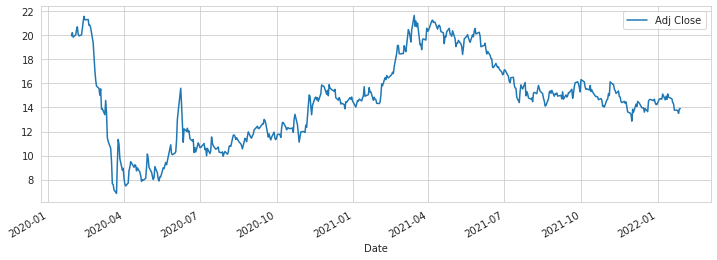

In [100]:
# Historical plots of closing price (Adj Close)

#Jetblu
JBLU['Adj Close'].plot(legend=True,figsize=(12,4));

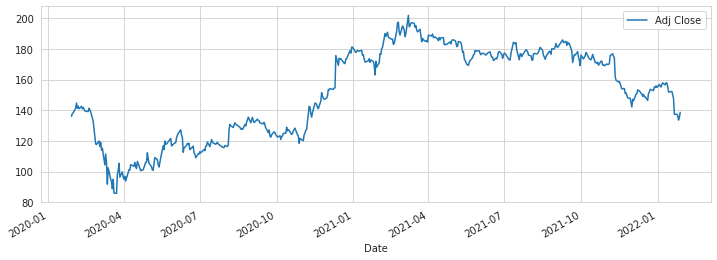

In [101]:
#Walt Disney
DIS['Adj Close'].plot(legend=True,figsize=(12,4));

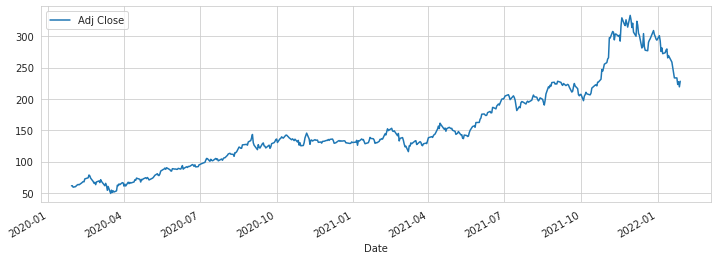

In [102]:
# NVIDIA
NVDA['Adj Close'].plot(legend=True,figsize=(12,4));

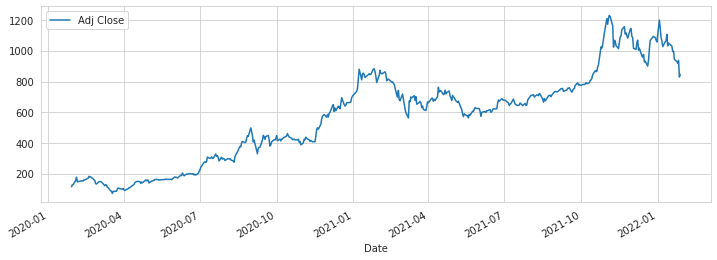

In [103]:
# TESLA
TSLA['Adj Close'].plot(legend=True,figsize=(12,4));

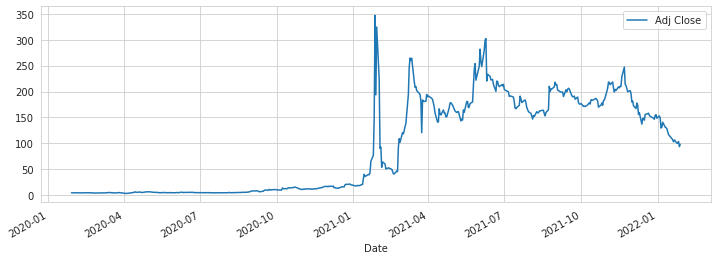

In [104]:
#Gamestop
GME['Adj Close'].plot(legend=True,figsize=(12,4));

# Insight 4, Finance



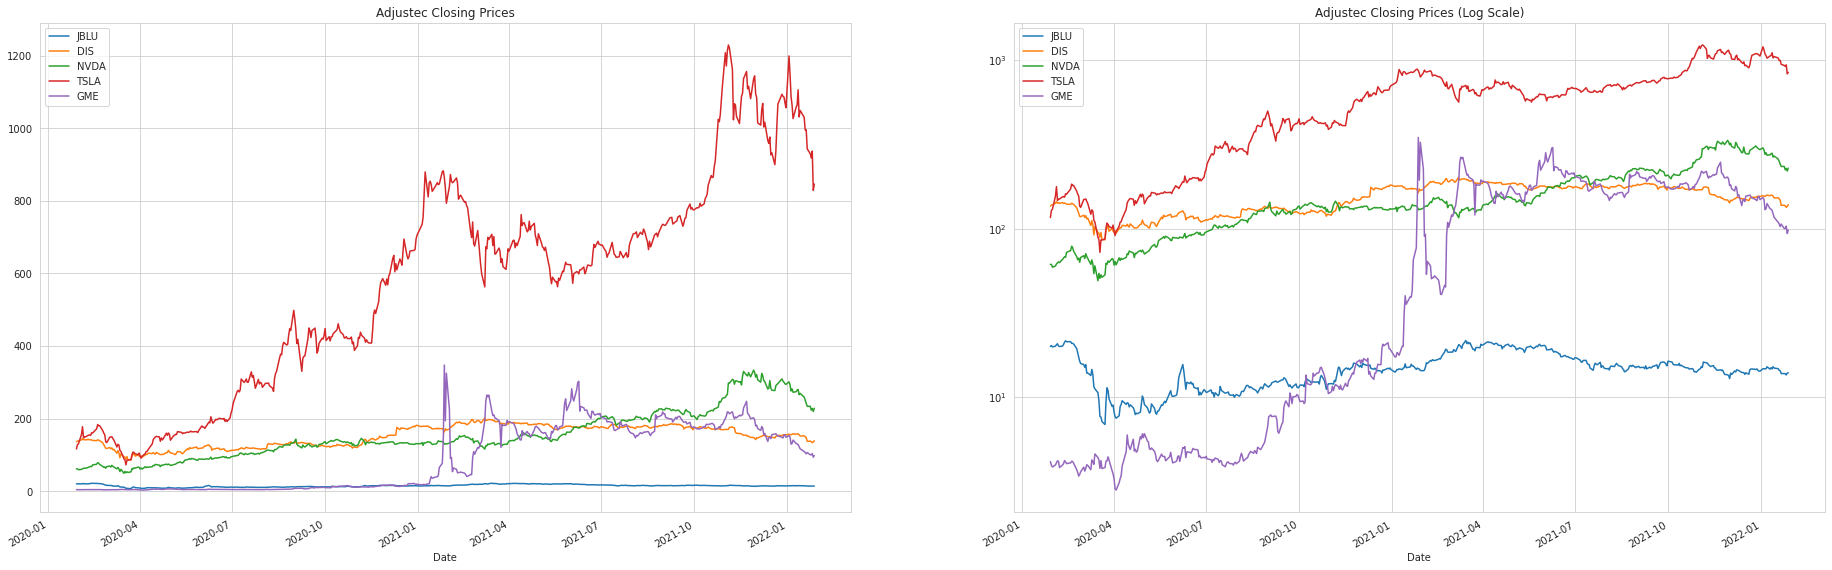

In [105]:
# putting them all together
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(32,10))
JBLU['Adj Close'].plot(label='JBLU', legend=True, ax=axes[0], title='Adjustec Closing Prices')
DIS['Adj Close'].plot(label='DIS',legend=True,ax=axes[0])
NVDA['Adj Close'].plot(label='NVDA',legend=True, ax=axes[0])
TSLA['Adj Close'].plot(label='TSLA',legend=True, ax=axes[0])
GME['Adj Close'].plot(label='GME',legend=True, ax=axes[0])

JBLU['Adj Close'].plot(label='JBLU', legend=True, ax=axes[1], title='Adjustec Closing Prices (Log Scale)')
DIS['Adj Close'].plot(label='DIS',legend=True,ax=axes[1])
NVDA['Adj Close'].plot(label='NVDA',legend=True, ax=axes[1])
TSLA['Adj Close'].plot(label='TSLA',legend=True, ax=axes[1])
GME['Adj Close'].plot(label='GME',legend=True, ax=axes[1])
plt.yscale('log')

In [106]:
fig = go.Figure()
fig.add_trace(go.Bar(
    x=ny_2021['month'],
    y=ny_2021['new_cases'],
    name='New_cases',
))
fig.add_trace(go.Bar(
    x=ny_2021['month'],
    y=ny_2021['new_deaths'],
    name='New_deaths',
))
# Here we modify the tickangle of the xaxis, resulting in rotated labels.
fig.update_layout(barmode='group')
fig.update_yaxes(type='log')
fig.show()

In [107]:
# daily return percentage
JBLU['Daily Return'] = JBLU['Adj Close'].pct_change()
DIS['Daily Return'] = DIS['Adj Close'].pct_change()
NVDA['Daily Return'] = NVDA['Adj Close'].pct_change()
TSLA['Daily Return'] = TSLA['Adj Close'].pct_change()
GME['Daily Return'] = GME['Adj Close'].pct_change()

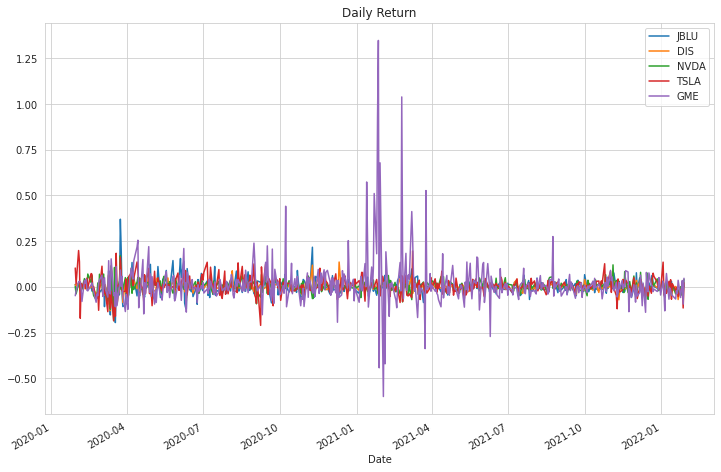

In [108]:
#plot individual or all 4
JBLU['Daily Return'].plot(label='JBLU', figsize=(12,8), title='Daily Return')
DIS['Daily Return'].plot(label='DIS')
NVDA['Daily Return'].plot(label='NVDA')
TSLA['Daily Return'].plot(label='TSLA')
GME['Daily Return'].plot(label='GME')
plt.legend();

# A GOOD PLOT

In [109]:
# Grab all the closing prices for the tech stock list into one DataFrame
closing_df = yf.download(['JBLU','DIS','NVDA','TSLA','GME'],start,end)['Adj Close']

[*********************100%***********************]  5 of 5 completed


In [110]:
# Make a new tech returns DataFrame
tech_rets = closing_df.pct_change()

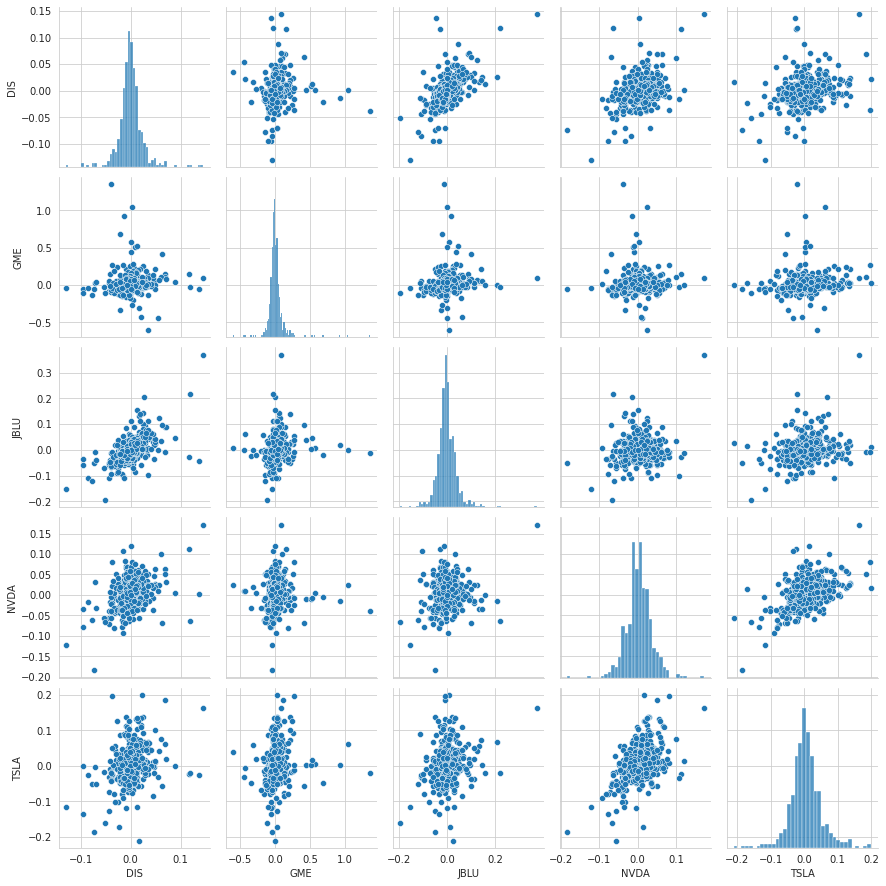

In [111]:
# check relationship with each pair
sns.pairplot(data=tech_rets.dropna());

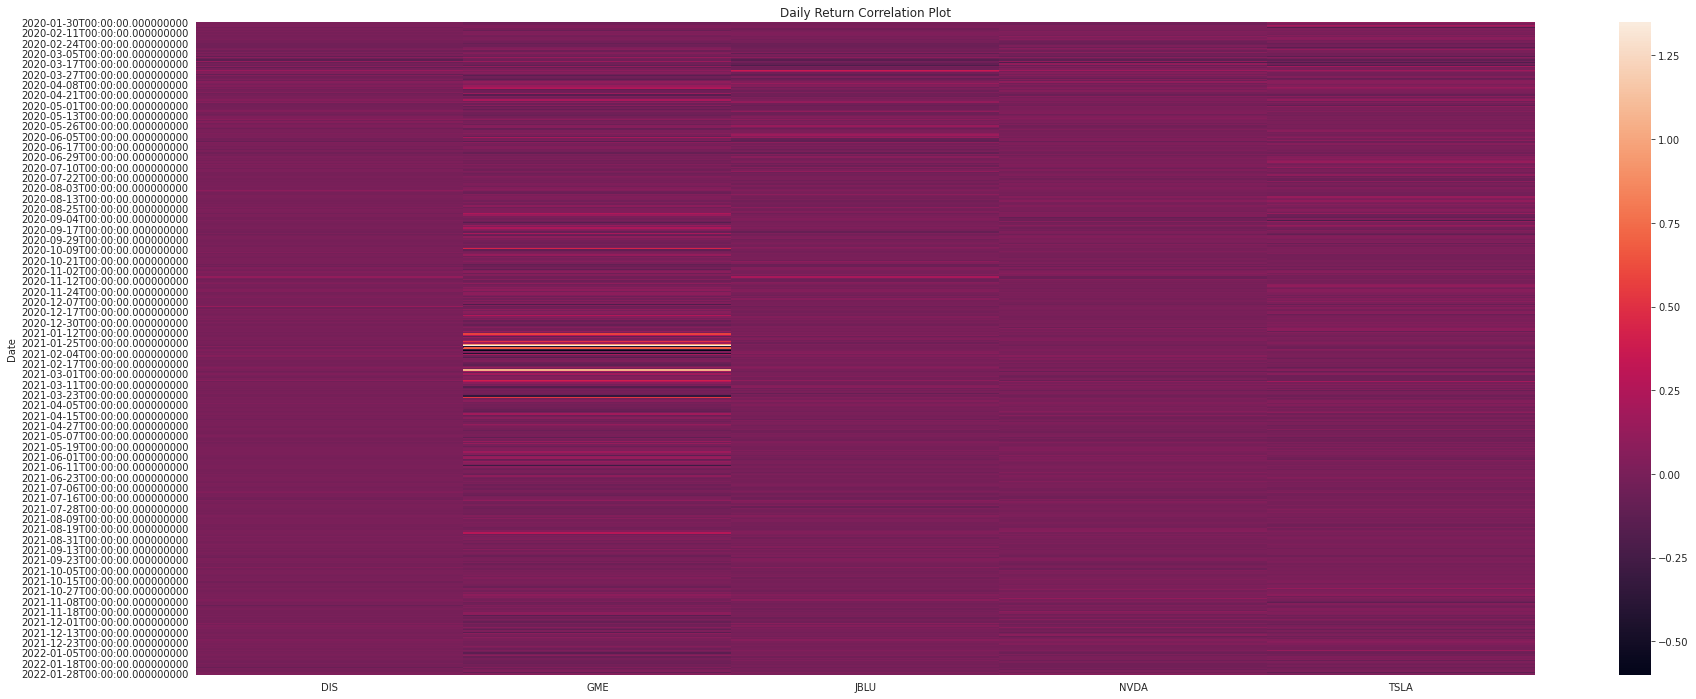

In [112]:
# check correlation
plt.figure(figsize=(30,12))
plt.title('Daily Return Correlation Plot')
sns.heatmap(data=tech_rets.dropna());

# Tableau info

In [113]:
%%HTML
<div class='tableauPlaceholder' id='viz1643488059396' style='position: relative'><object class='tableauViz'  style='display:none;'><param name='host_url' value='https%3A%2F%2Fpublic.tableau.com%2F' /> <param name='embed_code_version' value='3' /> <param name='site_root' value='' /><param name='name' value='COVIDTestsandVariantData&#47;Story1' /><param name='tabs' value='no' /><param name='toolbar' value='yes' /><param name='animate_transition' value='yes' /><param name='display_static_image' value='yes' /><param name='display_spinner' value='yes' /><param name='display_overlay' value='yes' /><param name='display_count' value='yes' /><param name='language' value='en-US' /><param name='filter' value='publish=yes' /></object></div>                <script type='text/javascript'>                    var divElement = document.getElementById('viz1643488059396');                    var vizElement = divElement.getElementsByTagName('object')[0];                    vizElement.style.width='100%';vizElement.style.height=(divElement.offsetWidth*0.75)+'px';                    var scriptElement = document.createElement('script');                    scriptElement.src = 'https://public.tableau.com/javascripts/api/viz_v1.js';                    vizElement.parentNode.insertBefore(scriptElement, vizElement);                </script>